In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv("insurance.csv")
print (df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


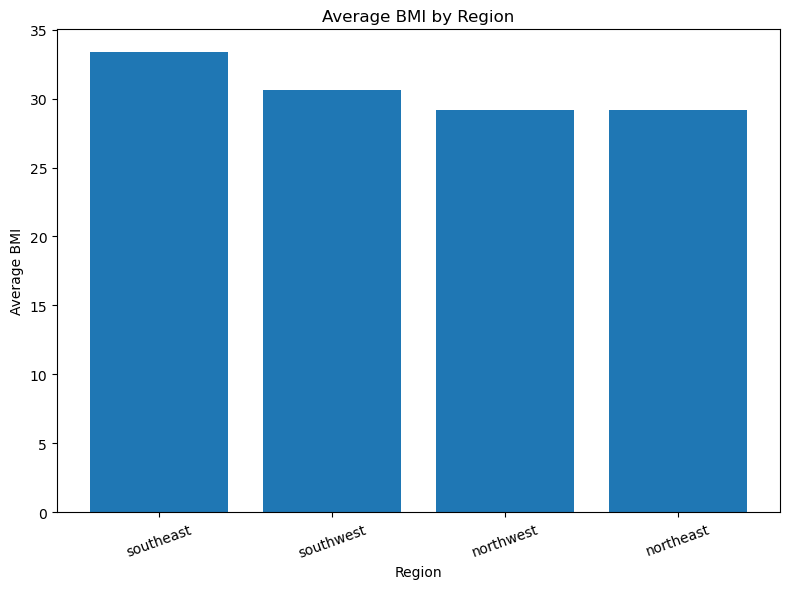

In [9]:
avg_bmi_by_region = df.groupby('region')['bmi'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(avg_bmi_by_region.index, avg_bmi_by_region.values)
plt.title('Average BMI by Region')
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


Let's create a linear regression model to predict insurance charges based on BMI, which is a common health indicator that might affect insurance costs.

In [10]:
from sklearn.model_selection import train_test_split

X = df[['bmi']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

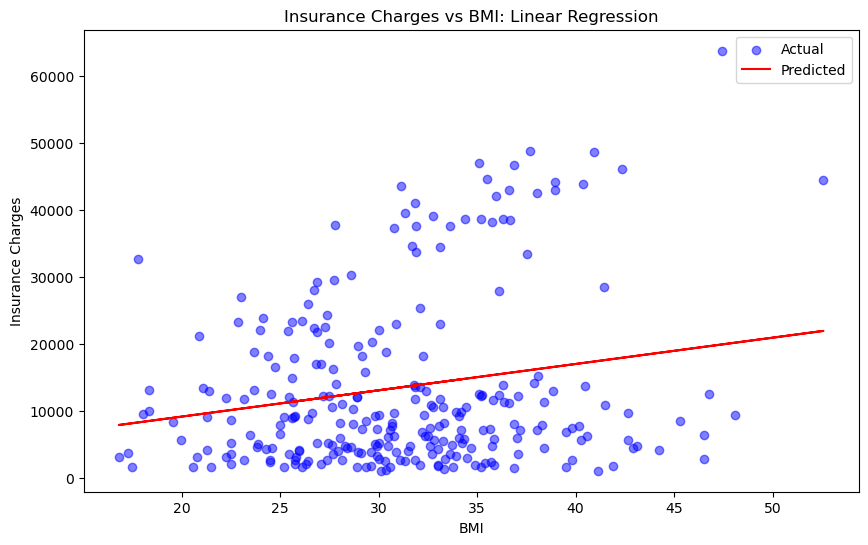

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges vs BMI: Linear Regression')
plt.legend()
plt.show()

R² Score shows how well the model fits the data (1.0 is perfect fit, 0.0 is poor fit)

In [13]:
from sklearn.metrics import r2_score

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")

R² Score: 0.040


Let's improve the model by including more relevant features

In [14]:
# Convert categorical variables to numeric
df_model = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
X = df_model.drop('charges', axis=1)
y = df_model['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R² Score with all features: {r2_score(y_test, y_pred):.3f}")

R² Score with all features: 0.784


In [16]:
# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
             Feature   Coefficient
6         smoker_yes  11825.564428
5          smoker_no -11825.564428
7   region_northeast    459.585244
2           children    425.278784
10  region_southwest   -350.214110
1                bmi    337.092552
0                age    256.975706
9   region_southeast   -198.279052
8   region_northwest     88.907918
4           sex_male     -9.295846
3         sex_female      9.295846
